In [5]:
import os, sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [6]:
base_path = 'fedpr_log/log/ablation/[baseline]/results.csv'
file1_path = 'fedpr_log/log/ablation/[cifarcnn-cifar10]reverse_linear/results.csv'
file2_path = 'fedpr_log/log/ablation/[cifarcnn-cifar10]server_linear/results.csv'
base, df1, df2 =pd.read_csv(base_path), pd.read_csv(file1_path), pd.read_csv(file2_path)

In [7]:
def unpacker(df, key, num_exp=3, num_rounds=300, idx=0):
    result = []
    
    for i in range(num_rounds):
        single_elem = []
        for j in range(num_exp):
            single_elem.append(list(df[key])[j*(num_rounds*num_exp)+i*3+idx])
        #print(single_elem)
        #single_elem = round(sum(single_elem)/num_exp, 3)
        result.append(single_elem)
    result = torch.Tensor(result)
    mean = result.mean(dim=1)
    under = mean - result.std(dim=1) 
    upper = mean + result.std(dim=1)

    mean, under, upper = mean.tolist(), under.tolist(), upper.tolist()
    return mean, under, upper


In [14]:
cost0, cost1, cost2 = unpacker(base, 'Cost'), unpacker(df1, 'Cost'), unpacker(df2, 'Cost')
sparsity0, sparsity1, sparsity2 = unpacker(base, 'sparsity'), unpacker(df1, 'sparsity'), unpacker(df2, 'sparsity')
acc0, acc1, acc2 = unpacker(base, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2), unpacker(df2, 'ACC', idx=2)
tr_loss0, tr_loss1, tr_loss2 = unpacker(base, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0), unpacker(df2, 'Loss', idx=0)
te_loss0, te_loss1, te_loss2 = unpacker(base, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1), unpacker(df2, 'Loss', idx=1)

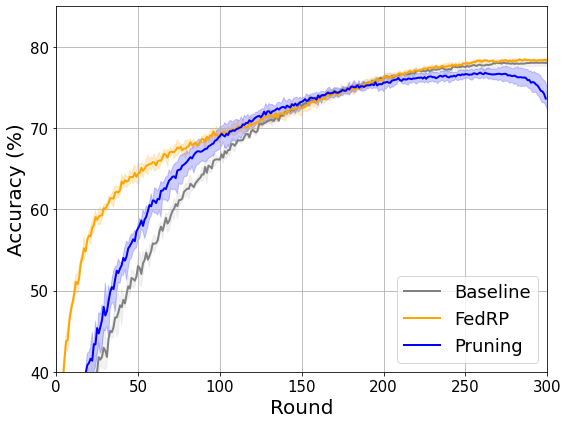

In [45]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.yticks([10*x for x in range(10)], fontsize=15)
plt.xticks([50*x for x in range(7)], fontsize=15)

# Baseline
plt.plot(rounds, acc0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, acc0[1], acc0[2], color='gray', alpha=0.1)

# FedRP
plt.plot(rounds, acc1[0], label='FedRP', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, acc1[1], acc1[2], color='orange', alpha=0.2)

# Pruning
plt.plot(acc2[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, acc2[1], acc2[2], color='blue', alpha=0.2)

#plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0,300)
plt.ylim(40,85)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

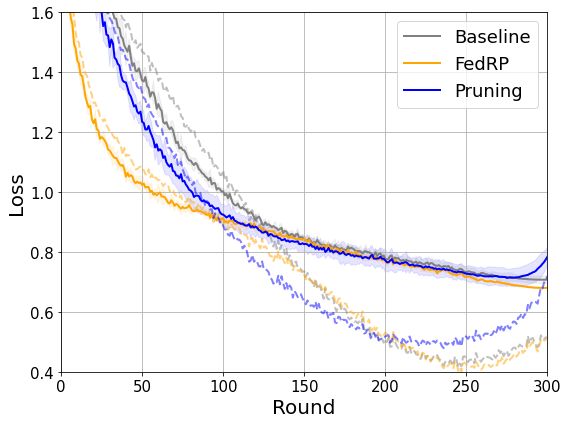

In [49]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.xticks([50*x for x in range(7)], fontsize=15)
plt.yticks([0.2*y for y in range(11)], fontsize=15)


plt.plot(rounds, te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(rounds, tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')
#plt.fill_between(rounds, tr_loss0[1], tr_loss0[2], color='gray', alpha=0.1)


plt.plot(rounds, te_loss1[0], label='FedRP', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='orange', alpha=0.1)
plt.plot(rounds, tr_loss1[0], lw=2, color='orange', alpha=0.5, linestyle='--')
#plt.fill_between(rounds, tr_loss1[1], tr_loss1[2], color='orange', alpha=0.1)

plt.plot(rounds, te_loss2[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, te_loss2[1], te_loss2[2], color='blue', alpha=0.1)
plt.plot(rounds, tr_loss2[0], lw=2, color='blue', alpha=0.5, linestyle='--')
#plt.fill_between(rounds, tr_loss2[1], tr_loss2[2], color='blue', alpha=0.1)

#plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0,300)
plt.ylim(0.4,1.6)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

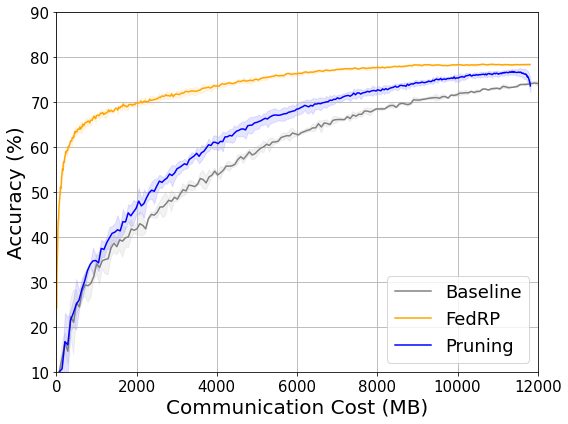

In [58]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.yticks([10*x for x in range(10)], fontsize=15)
plt.xticks([2000*x for x in range(10)], fontsize=15)
plt.plot(cost0[0], acc0[0], label='Baseline', lw=1.5, color='gray', alpha=1)
plt.fill_between(cost0[0], acc0[1], acc0[2], color='gray', alpha=0.1)

plt.plot(cost1[0], acc1[0], label='FedRP', lw=1.5, color='orange', alpha=1)
plt.fill_between(cost1[0], acc1[1], acc1[2], color='orange', alpha=0.1)


plt.plot(cost2[0], acc2[0], label='Pruning', lw=1.5, color='blue', alpha=1)
plt.fill_between(cost2[0], acc2[1], acc2[2], color='blue', alpha=0.1)

plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0,12000)
plt.ylim(10,90)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

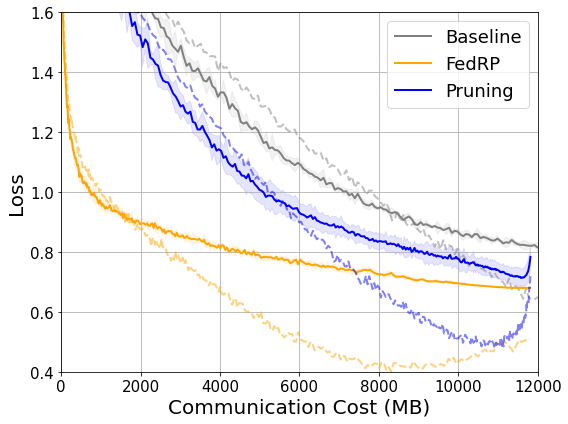

In [57]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.xticks([2000*x for x in range(10)], fontsize=15)
plt.yticks([0.2*y for y in range(11)], fontsize=15)


plt.plot(cost0[0], te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(cost0[0], te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(cost0[0], tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')
#plt.fill_between(cost0[0], tr_loss0[1], tr_loss0[2], color='gray', alpha=0.1)


plt.plot(cost1[0], te_loss1[0], label='FedRP', lw=2, color='orange', alpha=1)
plt.fill_between(cost1[0], te_loss1[1], te_loss1[2], color='orange', alpha=0.1)
plt.plot(cost1[0], tr_loss1[0], lw=2, color='orange', alpha=0.5, linestyle='--')
#plt.fill_between(cost1[0], tr_loss1[1], tr_loss1[2], color='orange', alpha=0.1)

plt.plot(cost2[0], te_loss2[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(cost2[0], te_loss2[1], te_loss2[2], color='blue', alpha=0.1)
plt.plot(cost2[0], tr_loss2[0], lw=2, color='blue', alpha=0.5, linestyle='--')
#plt.fill_between(cost2[0], tr_loss2[1], tr_loss2[2], color='blue', alpha=0.1)

#plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0,12000)
plt.ylim(0.4,1.6)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

### Ablation 2 Plotting

In [65]:
base_path = 'fedpr_log/log/ablation/[baseline]/results.csv'
file1_path = 'fedpr_log/log/ablation/[cifarcnn-cifar10]reverse_linear_warm_fine/results.csv'
file2_path = 'fedpr_log/log/ablation/[cifarcnn-cifar10]server_linear_warm_fine/results.csv'
base, df1, df2 =pd.read_csv(base_path), pd.read_csv(file1_path), pd.read_csv(file2_path)


In [66]:
cost0, cost1, cost2 = unpacker(base, 'Cost'), unpacker(df1, 'Cost'), unpacker(df2, 'Cost')
sparsity0, sparsity1, sparsity2 = unpacker(base, 'sparsity'), unpacker(df1, 'sparsity'), unpacker(df2, 'sparsity')
acc0, acc1, acc2 = unpacker(base, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2), unpacker(df2, 'ACC', idx=2)
tr_loss0, tr_loss1, tr_loss2 = unpacker(base, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0), unpacker(df2, 'Loss', idx=0)
te_loss0, te_loss1, te_loss2 = unpacker(base, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1), unpacker(df2, 'Loss', idx=1)

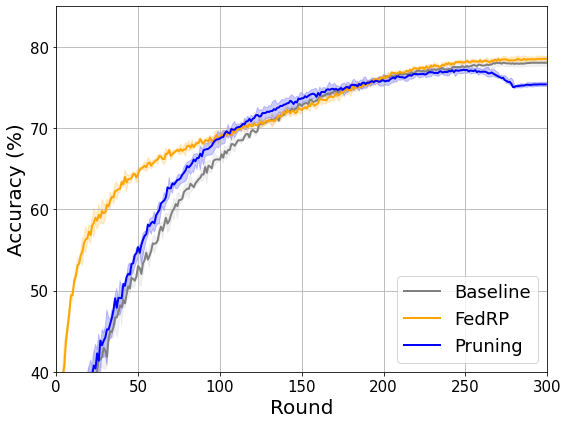

In [67]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.yticks([10*x for x in range(10)], fontsize=15)
plt.xticks([50*x for x in range(7)], fontsize=15)

# Baseline
plt.plot(rounds, acc0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, acc0[1], acc0[2], color='gray', alpha=0.1)

# FedRP
plt.plot(rounds, acc1[0], label='FedRP', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, acc1[1], acc1[2], color='orange', alpha=0.2)

# Pruning
plt.plot(acc2[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, acc2[1], acc2[2], color='blue', alpha=0.2)

#plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0,300)
plt.ylim(40,85)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

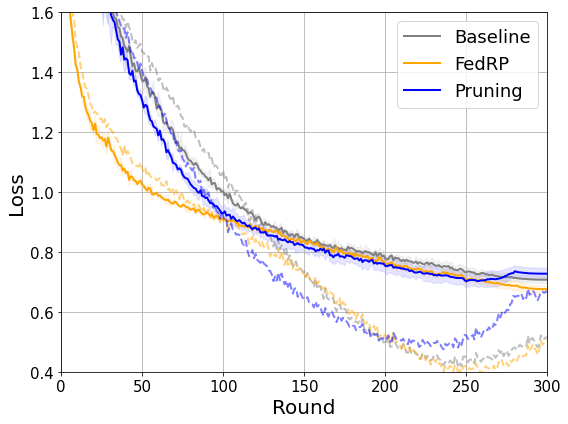

In [68]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.xticks([50*x for x in range(7)], fontsize=15)
plt.yticks([0.2*y for y in range(11)], fontsize=15)


plt.plot(rounds, te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(rounds, tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')
#plt.fill_between(rounds, tr_loss0[1], tr_loss0[2], color='gray', alpha=0.1)


plt.plot(rounds, te_loss1[0], label='FedRP', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='orange', alpha=0.1)
plt.plot(rounds, tr_loss1[0], lw=2, color='orange', alpha=0.5, linestyle='--')
#plt.fill_between(rounds, tr_loss1[1], tr_loss1[2], color='orange', alpha=0.1)

plt.plot(rounds, te_loss2[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, te_loss2[1], te_loss2[2], color='blue', alpha=0.1)
plt.plot(rounds, tr_loss2[0], lw=2, color='blue', alpha=0.5, linestyle='--')
#plt.fill_between(rounds, tr_loss2[1], tr_loss2[2], color='blue', alpha=0.1)

#plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0,300)
plt.ylim(0.4,1.6)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

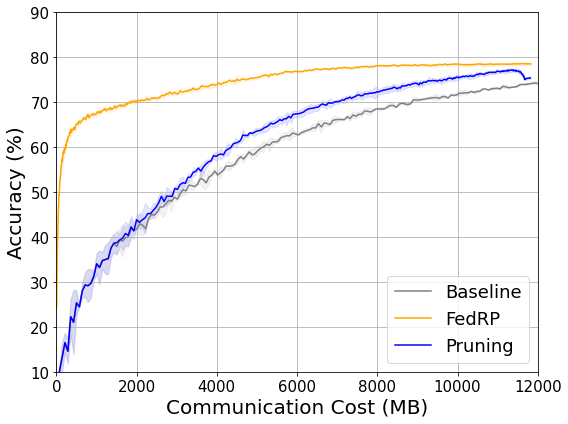

In [69]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.yticks([10*x for x in range(10)], fontsize=15)
plt.xticks([2000*x for x in range(10)], fontsize=15)
plt.plot(cost0[0], acc0[0], label='Baseline', lw=1.5, color='gray', alpha=1)
plt.fill_between(cost0[0], acc0[1], acc0[2], color='gray', alpha=0.1)

plt.plot(cost1[0], acc1[0], label='FedRP', lw=1.5, color='orange', alpha=1)
plt.fill_between(cost1[0], acc1[1], acc1[2], color='orange', alpha=0.1)


plt.plot(cost2[0], acc2[0], label='Pruning', lw=1.5, color='blue', alpha=1)
plt.fill_between(cost2[0], acc2[1], acc2[2], color='blue', alpha=0.1)

plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0,12000)
plt.ylim(10,90)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

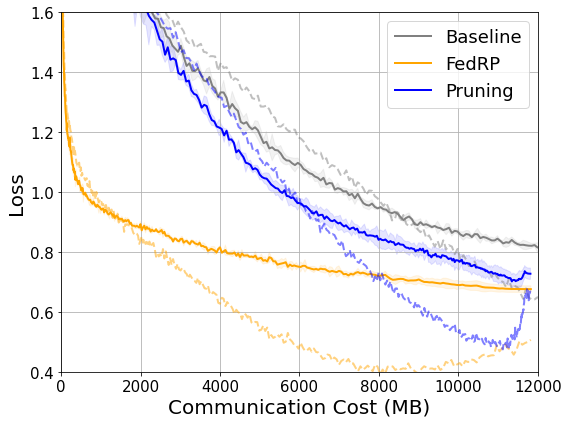

In [70]:
rounds = [x+1 for x in range(300)]

fig = plt.figure(figsize=(8,6))
plt.xticks([2000*x for x in range(10)], fontsize=15)
plt.yticks([0.2*y for y in range(11)], fontsize=15)


plt.plot(cost0[0], te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(cost0[0], te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(cost0[0], tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')
#plt.fill_between(cost0[0], tr_loss0[1], tr_loss0[2], color='gray', alpha=0.1)


plt.plot(cost1[0], te_loss1[0], label='FedRP', lw=2, color='orange', alpha=1)
plt.fill_between(cost1[0], te_loss1[1], te_loss1[2], color='orange', alpha=0.1)
plt.plot(cost1[0], tr_loss1[0], lw=2, color='orange', alpha=0.5, linestyle='--')
#plt.fill_between(cost1[0], tr_loss1[1], tr_loss1[2], color='orange', alpha=0.1)

plt.plot(cost2[0], te_loss2[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(cost2[0], te_loss2[1], te_loss2[2], color='blue', alpha=0.1)
plt.plot(cost2[0], tr_loss2[0], lw=2, color='blue', alpha=0.5, linestyle='--')
#plt.fill_between(cost2[0], tr_loss2[1], tr_loss2[2], color='blue', alpha=0.1)

#plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Communication Cost (MB)', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0,12000)
plt.ylim(0.4,1.6)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()